# Maximal Margin Classifier

* [Here](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py) is a scikit-learn example of plotting a separating hyperplane
    * [This one](http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_separating_hyperplane.html#sphx-glr-auto-examples-linear-model-plot-sgd-separating-hyperplane-py) is very similar.
* [This blog on building a SVM from scratch](https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc) seems pretty helpful
    * but, his blog on [the math behind SVM's](https://medium.com/deep-math-machine-learning-ai/chapter-3-support-vector-machine-with-math-47d6193c82be) might be better.
* [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
* This article is a mathematical formulation from MIT: [How to calculate support vectors by hand](https://ai6034.mit.edu/wiki/images/SVM_and_Boosting.pdf)
* [Great tutorial and readable code](https://maviccprp.github.io/a-support-vector-machine-in-just-a-few-lines-of-python-code/) on implementing a SVM from scratch.
* [fairly intuitive slides on SVM](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf) -> Make sure to come back to this!
* [Siraj Ravel's svm from scratch code](https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb)
* Of course, Jake Vanderplas has a [pretty great tutorial on building svm's](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

from sklearn.svm import SVC

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=3) # 3 and 6 are  pretty good
np.place(y, y == 0, -1)

## First, we plot it

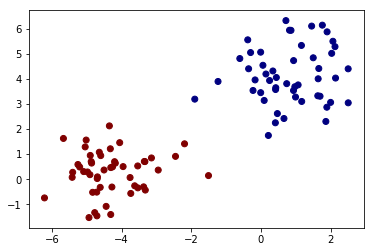

In [5]:
plt.figure(figsize = (6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')

---

## Next, try to find separating hyperplane

In [6]:
# Create support vector classifier
svc = SVC(kernel='linear')

# Train model
clf = svc.fit(X, y)

* Shout out to [Chris Albon's blog](https://chrisalbon.com/machine_learning/support_vector_machines/plot_support_vector_classifier_hyperplane/) for the understandable code.
* Shout out to [John Wittenauer's blog](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/) for a readable implementation of batch gradient descent

A hyperplane in two dimensions is defined as: $\beta_0+\beta_1X_1+\beta_2X_2=0$.
In order to turn this into code that we can plot/graph and work with, we must manipulate it into "$y=mx+b$" form.
\begin{align*}
	\beta_0+\beta_1X_1+\beta_2X_2&=0\\
	\beta_2X_2&=-\beta_1X_1-\beta_0\\
	X_2&= \frac{-\beta_1X_1}{\beta_2}-\frac{\beta_0}{\beta_2}
\end{align*}

In [7]:
def decision_function(X, y):
    '''
    Takes X, y.
    Returns the distance of the samples X to the separating hyperplane
    Classes in y must be either 1 or -1
    '''
    weights = np.array([model.coef_[0][0], model.coef_[0][1]])
    linear_combo = np.dot(X_blob, weights.T) + model.intercept_[0]
    dist_from_hyp = np.multiply(y_blob, magnitudes)    # page 343 ISLR (this is also what clf.decision_function_ returns)
    
    return dist_from_hyp

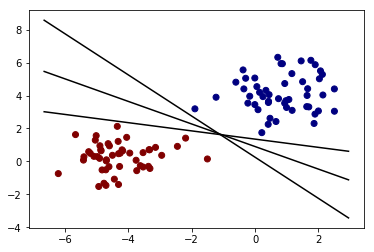

In [9]:
plt.figure(figsize = (6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')


# Get x and y lims
ax_1 = plt.gca()
xlim = ax_1.get_xlim()
ylim = ax_1.get_ylim()

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1], 100)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot optimal separating hyperplane
plt.plot(xx, yy, 'k-')

# plot other hyperplanes
y1 = -1.25 * xx + .25
plt.plot(xx, y1, 'k-')
y2 = -.25 * xx + 1.35
plt.plot(xx, y2, 'k-')

plt.axis('tight')
plt.savefig('many_hyps.png')

---

## Now, use our Max margin classifier to find the optimal hyperplane

* If having trouble interpreting how to plot the  margins: [this link](http://www.mathwarehouse.com/algebra/linear_equation/write-equation/equation-of-line-parallel-through-point.php) covers how to write the equation of a line, parallel to a line, through a point

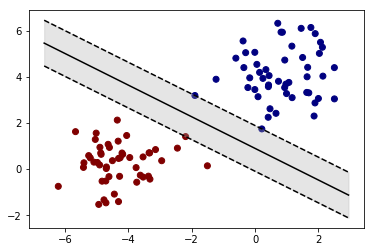

In [11]:
plt.figure(figsize = (6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')


# Get x and y lims
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1], 100)
yy = a * xx - (clf.intercept_[0]) / w[1]

# get the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, edgecolor='none', color='#AAAAAA', alpha=0.3)


plt.axis('tight')
plt.savefig('max_margin.png')
plt.show()

In [250]:
print('The intercept term is:', clf.intercept_, '\nThe coefficients are:', clf.coef_)

The intercept term is: [ 0.90732128] 
The coefficients are: [[-0.69194716 -1.00958201]]


In [251]:
clf.support_vectors_

array([[ 0.21219196,  1.74387328],
       [-1.8997797 ,  3.19111595],
       [-2.19341554,  1.41161044]])

---

## Now show how one outlier can skew our separating hyperplane

In [13]:
# create skewed observations and add to data
skewed_X = np.array([[-3.5,4]])
skewed_y = np.array([1])
skewed_X = np.vstack((X,skewed_X))
skewed_y = np.hstack((y,skewed_y))

# create and train skewed svm
skewed_svc = SVC(kernel='linear', C=10)
skewed_clf = skewed_svc.fit(skewed_X, skewed_y)

# get the separating hyperplane
w_skewed = skewed_clf.coef_[0]
a_skewed = -w_skewed[0] / w_skewed[1]
xx = np.linspace(xlim[0], xlim[1], 100)
yy_skewed = a_skewed * xx - (skewed_clf.intercept_[0]) / w_skewed[1]


# get the parallels to the separating hyperplane that pass through the
# support vectors
b_skewed = skewed_clf.support_vectors_[0]
yy_down_skewed = a_skewed * xx + (b_skewed[1] - a_skewed * b_skewed[0])
b_skewed = skewed_clf.support_vectors_[-1]
yy_up_skewed = a_skewed * xx + (b_skewed[1] - a_skewed * b_skewed[0])

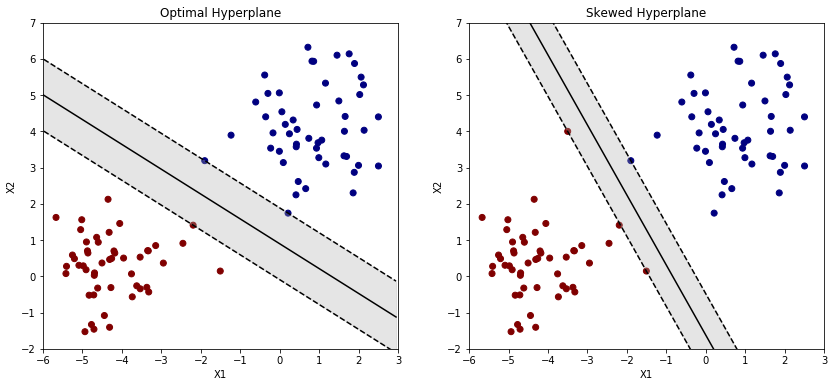

In [14]:
# define figure and add subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

# plot data
ax1.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')

# plot skewed data
ax2.scatter(skewed_X[:,0], skewed_X[:,1], c=skewed_y, cmap = 'jet')

# plot hyper plane and margin of data
ax1.plot(xx, yy, 'k-')
ax1.plot(xx, yy_down, 'k--')
ax1.plot(xx, yy_up, 'k--')
ax1.fill_between(xx, yy_down, yy_up, edgecolor='none', color='#AAAAAA', alpha=0.3)

#plot hyperplane and margin of skewed data
ax2.plot(xx, yy_skewed, 'k-')    # not sure why this one doesn't work ###############################
ax2.plot(xx, yy_down_skewed, 'k--')
ax2.plot(xx, yy_up_skewed, 'k--')
ax2.fill_between(xx, yy_down_skewed, yy_up_skewed, edgecolor='none', color='#AAAAAA', alpha=0.3)



# Left plot (first split)
ax1.set_title('Optimal Hyperplane')

# Right plot (all splits)
ax2.set_title('Skewed Hyperplane')

for ax in fig.axes:
    ax.set_ylabel('X2')
    ax.set_ylim(-2,7)
    ax.set_xlabel('X1')
    ax.set_xlim(-6,3)
    
plt.savefig('skewed_hyp.png')

In [284]:
skewed_clf.coef_

array([[-0.93223309, -0.48228977]])

---

### IDeas:
* Make the margins filled in like Jake Vanderplas does
* Make a widget that displays max margin randomizer of the data
* Show how a single outlier can impact the separating hyperplane (for thie, figure out how to put two graphs side by side)
* better cmap for colorblind

In [34]:
def f(x):
    y = a * x - (clf.intercept_[0]) / w[1]
    return y

In [37]:
f(-2)

2.2694695124622277